Query point [[1, 1]] is predicted red
Query point [[5, 1]] is predicted blue
Query point [[1, 6]] is predicted blue
Query point [[3, 3]] is predicted blue


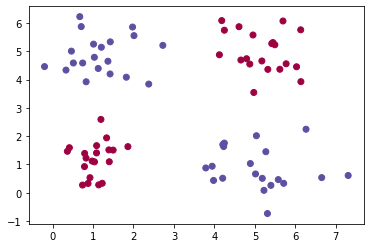

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sortedcontainers import SortedKeyList

# FUNCTION: Create XOR dataset.
# Data set is created by sampling from a Gaussian distribution around
# four centroids:
# Points around (1,1) are assigned the value "0" (red)
# Points around (5,5) are assigned the value "0" (red)
# Points around (1,5) are assigned the value "1" (blue)
# Points around (5,1) are assigned the value "1" (blue)
def createXORdata():
  off1 = np.random.multivariate_normal([1, 1], 0.5*np.identity(2), 20);
  off2 = np.random.multivariate_normal([5, 5], 0.5*np.identity(2), 20);
  on1 = np.random.multivariate_normal([1, 5], 0.5*np.identity(2), 20);
  on2 = np.random.multivariate_normal([5, 1], 0.5*np.identity(2), 20);
  X    = np.concatenate((off1, off2, on1, on2));
  zer = np.zeros(off1.shape[0] + off2.shape[0])
  one = np.ones(on1.shape[0] + on2.shape[0])
  y    = np.concatenate((zer,one))
  return X,y

# FUNCTION: KNN search.
# We use a naive algorithm for KNN search (linear search):
# compute the distance from q to every point in the set X, 
# keeping track of the k "best so far"
def KNN_search(X,y,q,k):

  # Initialize list of neighbors. 
  # We keep a sorted list with the k nearest neighbors, 
  # sorted by key = distance to query point.
  neighbors = SortedKeyList(key=lambda x: x[0])

  dist_k_best = np.inf # initialize distance of k "best so far" to infinity

  # loop over every point in X
  for i in range(len(X)):
    x = X[i]
    d = np.linalg.norm(x-q) # Euclidean distance between x and q
    if d < dist_k_best:
      neighbors.add([d,x,y[i]])  # add point x to list of neighbors, with key d
      if len(neighbors)>k:
        n = neighbors.pop(k-1)  # pop kth neighbor
      else:
        n = neighbors[-1]       # no need to pop kth neighbor

      dist_k_best = n[0]  # update distance of k "best so far"

  return neighbors

# FUNCTION: KNN predictor.
# Predict color of a query point q, given a trained model X,y.
def KNN_predict(X,y,q,k):
  neighbors = KNN_search(X,y,q,k)
  #print(list(neighbors))

  # Find majority vote for the color of query point q
  num_red = 0
  for n in neighbors:
    if n[2] == 0:
      num_red += 1
  num_blue = k-num_red

  if num_blue > num_red:
    print("Query point", q, "is predicted blue")
  else:
    print("Query point", q, "is predicted red")

# MAIN PROGRAM starts here
X,y = createXORdata()

# Plot created XOR data. 
# Use Spectral colormap, so that 0 is red and 1 is blue.
xcoords, ycoords = zip(*X)
plt.scatter(xcoords, ycoords, c=y, cmap="Spectral")

# No need to train the model, since it is non-parametric

# Make a prediction for a few query points q
neighbors = KNN_predict(X,y,[[1,1]],3)
neighbors = KNN_predict(X,y,[[5,1]],3)
neighbors = KNN_predict(X,y,[[1,6]],3)

# The point (3,3) is at the boundary, so it is sometimes predicted red, 
# sometimes blue.
neighbors = KNN_predict(X,y,[[3,3]],3)
